# **Part 3: Evaluate `Cart-Pole` Agent Performance.**

In [1]:
from evaluate import *

In [27]:
def plot_q_values_3d_dual(q_values, left_pair, left_range, right_pair, right_range):
    """
    Create two 3D plots side-by-side from Q-values:
      - Left plot uses state indices specified in left_pair (tuple: (x_index, y_index))
        with range left_range (tuple: (x_max, y_max))
      - Right plot uses state indices specified in right_pair (tuple: (x_index, y_index))
        with range right_range (tuple: (x_max, y_max))
    The z-axis in each plot is the maximum Q-value from the list for that state.
    If a state key is not in the specified range, its value is set to 0.

    Additionally, axis labels are provided according to the following mapping:
      0: Cart Pose
      1: Pole Pose
      2: Cart Velocity
      3: Pole Velocity

    Args:
        q_values (dict): Dictionary with keys as state tuples and values as list of Q-values.
        left_pair (tuple): (x_index, y_index) for the left plot.
        left_range (tuple): (x_max, y_max) for the left plot.
        right_pair (tuple): (x_index, y_index) for the right plot.
        right_range (tuple): (x_max, y_max) for the right plot.
    """
    # Mapping from state dimension index to label.
    dim_labels = {
        0: "Cart Pose",
        1: "Pole Pose",
        2: "Cart Velocity",
        3: "Pole Velocity"
    }
    
    # Left plot settings
    left_x_index, left_y_index = left_pair
    left_x_min, left_x_max = 0, left_range[0]  # left_range[0] is the number of states for dimension x
    left_y_min, left_y_max = 0, left_range[1]  # left_range[1] is the number of states for dimension y
    left_x_vals = np.arange(left_x_min, left_x_max)  # now it will create exactly left_range[0] points: 0 to left_range[0]-1
    left_y_vals = np.arange(left_y_min, left_y_max)
    X_left, Y_left = np.meshgrid(left_x_vals, left_y_vals)
    Z_left = np.zeros_like(X_left, dtype=float)
    
    # Fill grid for left plot using indices specified in left_pair
    for state, values in q_values.items():
        x_val = state[left_x_index]
        y_val = state[left_y_index]
        if left_x_min <= x_val < left_x_max and left_y_min <= y_val < left_y_max:
            max_val = max(values) if values else 0
            xi = int(x_val - left_x_min)
            yi = int(y_val - left_y_min)
            Z_left[yi, xi] = max_val

    # Right plot settings
    right_x_index, right_y_index = right_pair
    right_x_min, right_x_max = 0, right_range[0]
    right_y_min, right_y_max = 0, right_range[1]
    right_x_vals = np.arange(right_x_min, right_x_max)
    right_y_vals = np.arange(right_y_min, right_y_max)
    X_right, Y_right = np.meshgrid(right_x_vals, right_y_vals)
    Z_right = np.zeros_like(X_right, dtype=float)
    
    # Fill grid for right plot using indices specified in right_pair
    for state, values in q_values.items():
        if len(state) <= max(right_x_index, right_y_index):
            continue
        x_val = state[right_x_index]
        y_val = state[right_y_index]
        if right_x_min <= x_val < right_x_max and right_y_min <= y_val < right_y_max:
            max_val = max(values) if values else 0
            xi = int(x_val - right_x_min)
            yi = int(y_val - right_y_min)
            Z_right[yi, xi] = max_val

    # Create figure with two subplots side-by-side
    fig = plt.figure(figsize=(16, 6))
    
    # Left subplot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf1 = ax1.plot_surface(X_left, Y_left, Z_left, cmap='viridis', edgecolor='none')
    ax1.set_xlabel(f"{dim_labels.get(left_x_index, f'Dim {left_x_index}')}")
    ax1.set_ylabel(f"{dim_labels.get(left_y_index, f'Dim {left_y_index}')}")
    ax1.set_zlabel("Max Q-value")
    ax1.set_title(f"3D Q-values (indices {left_pair[0]}, {left_pair[1]})")
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
    
    # Right subplot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    surf2 = ax2.plot_surface(X_right, Y_right, Z_right, cmap='viridis', edgecolor='none')
    ax2.set_xlabel(f"{dim_labels.get(right_x_index, f'Dim {right_x_index}')}")
    ax2.set_ylabel(f"{dim_labels.get(right_y_index, f'Dim {right_y_index}')}")
    ax2.set_zlabel("Max Q-value")
    ax2.set_title(f"3D Q-values (indices {right_pair[0]}, {right_pair[1]})")
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
    
    plt.tight_layout()
    plt.show()


- Analyzing the Q-table can be challenging due to the high dimensionality of the state space. In a 3D plot, the z-axis typically represents the maximum action-value for each state, which indicates the quality or expected return of that state relative to others. This visualization helps to see how different states compare, but interpreting high-dimensional data remains complex.

**Description for Analysis**
- In this section, I will describe how the agent learns using only the final Q-table, but for the deployment performance(Video), I will explain every step in detail.

## **Base-line Experiment**
- Evaluate and Analysis all algorithm learning performance and deployment performance with same configure in base line experiment in PART 2

### **Q Learning**

<>:1: SyntaxWarning: invalid escape sequence '\Q'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\Q'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\emper\AppData\Local\Temp\ipykernel_2480\441225243.py:1: SyntaxWarning: invalid escape sequence '\Q'
  q_learn_reward_file = "reward_value\QL_r_0.json"
C:\Users\emper\AppData\Local\Temp\ipykernel_2480\441225243.py:2: SyntaxWarning: invalid escape sequence '\S'
  q_learn_q_value_file_5000 = "q_value\Stabilize\Q_Learning\Q_Learning0\Q_Learning_0_5000_5_12_4_8.json"
C:\Users\emper\AppData\Local\Temp\ipykernel_2480\441225243.py:3: SyntaxWarning: invalid escape sequence '\S'
  q_learn_q_value_file_3000 = "q_value\Stabilize\Q_Learning\Q_Learning0\Q_Learning_0_3000_5_12_4_8.json"
C:\Users\emp

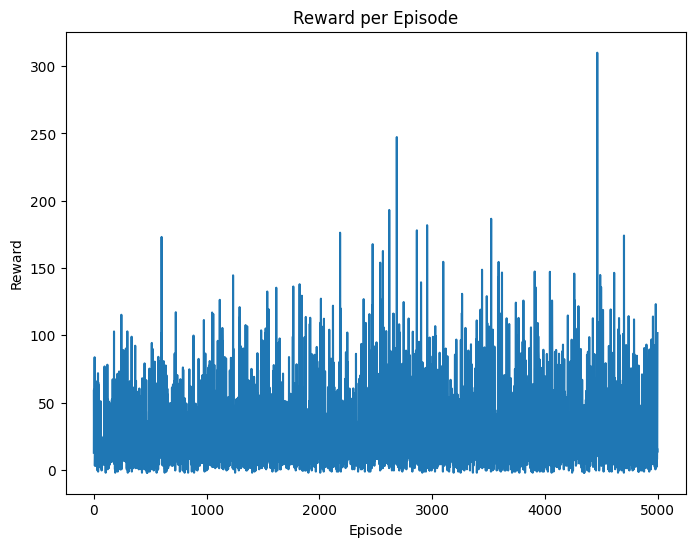

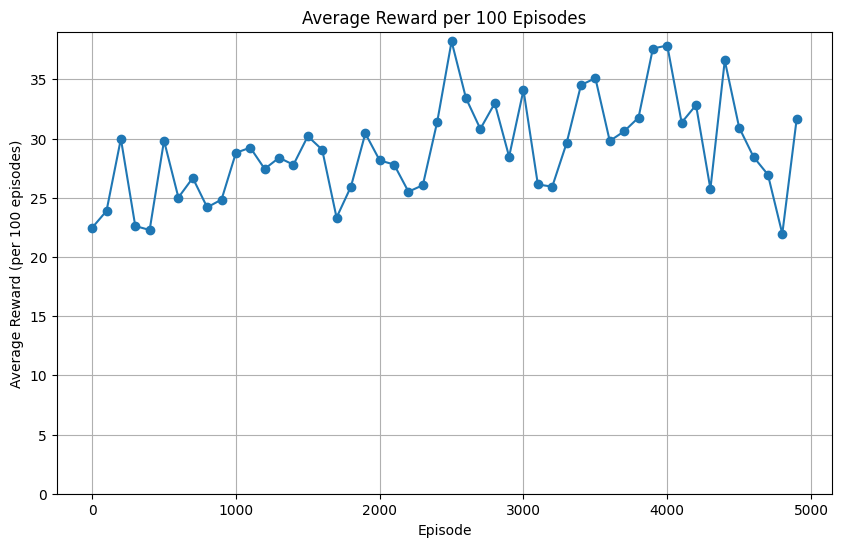

In [21]:
q_learn_reward_file = "reward_value\QL_r_0.json"
q_learn_q_value_file_5000 = "q_value\Stabilize\Q_Learning\Q_Learning0\Q_Learning_0_5000_5_12_4_8.json"
q_learn_q_value_file_3000 = "q_value\Stabilize\Q_Learning\Q_Learning0\Q_Learning_0_3000_5_12_4_8.json"
q_learn_q_value_file_1000 = "q_value\Stabilize\Q_Learning\Q_Learning0\Q_Learning_0_1000_5_12_4_8.json"

plot_reward(q_learn_reward_file)
plot_reward_grouped(q_learn_reward_file, 100)

- for analysis reward value we using moving average of 100 episode to see how much agent can exploit maximum cumulative reward each iteration, reward value from start to the end not much difference

#### **Episode 1000**

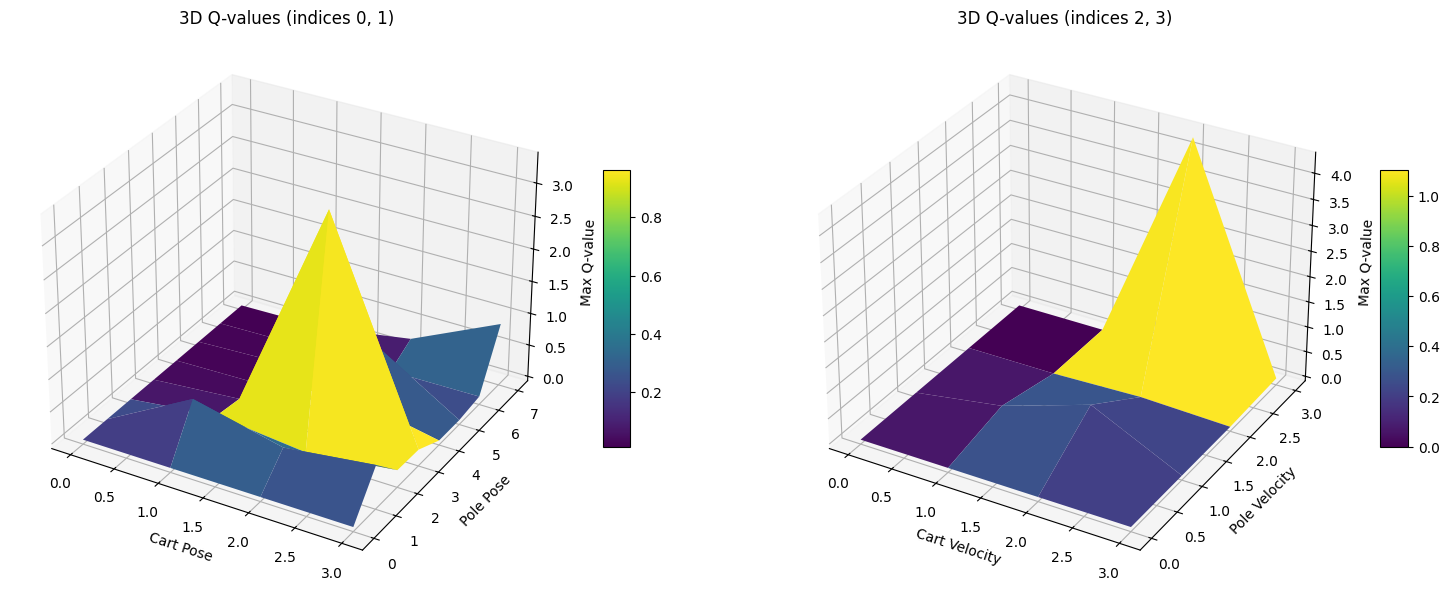

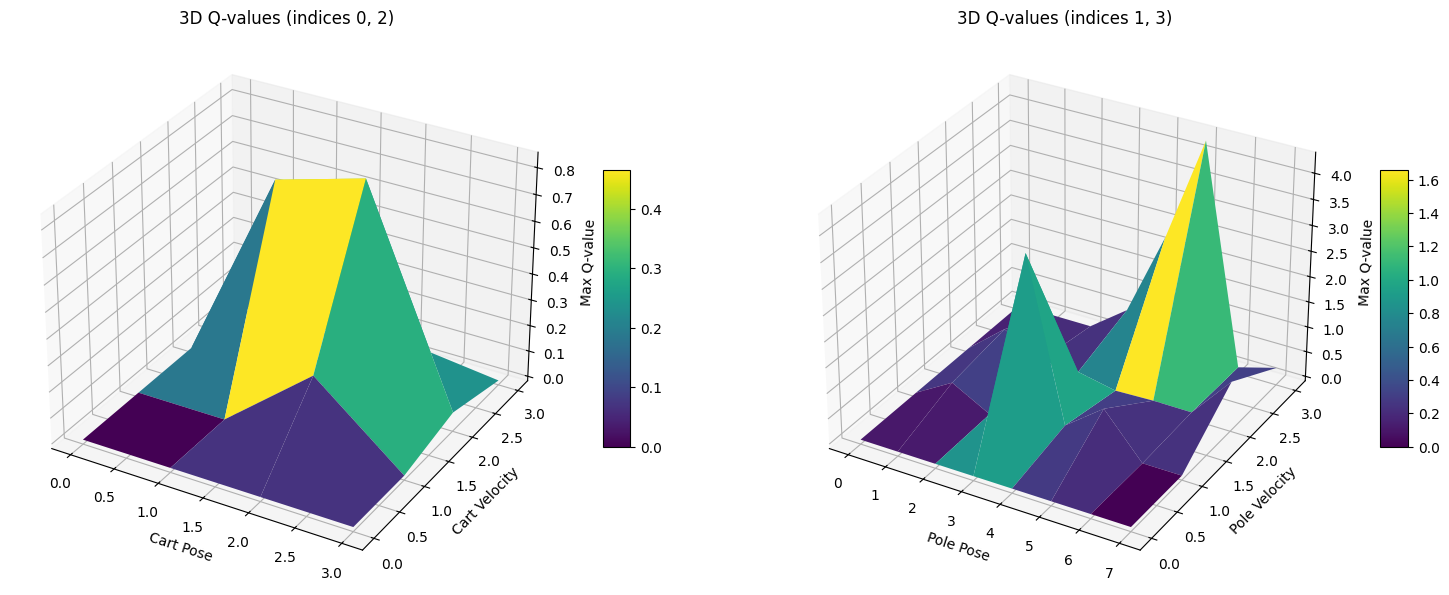

In [28]:
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_1000), (0,1), (4,8),(2,3), (4,4))
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_1000), (0,2), (4,4),(1,3), (8,4))

#### **Episode 3000**

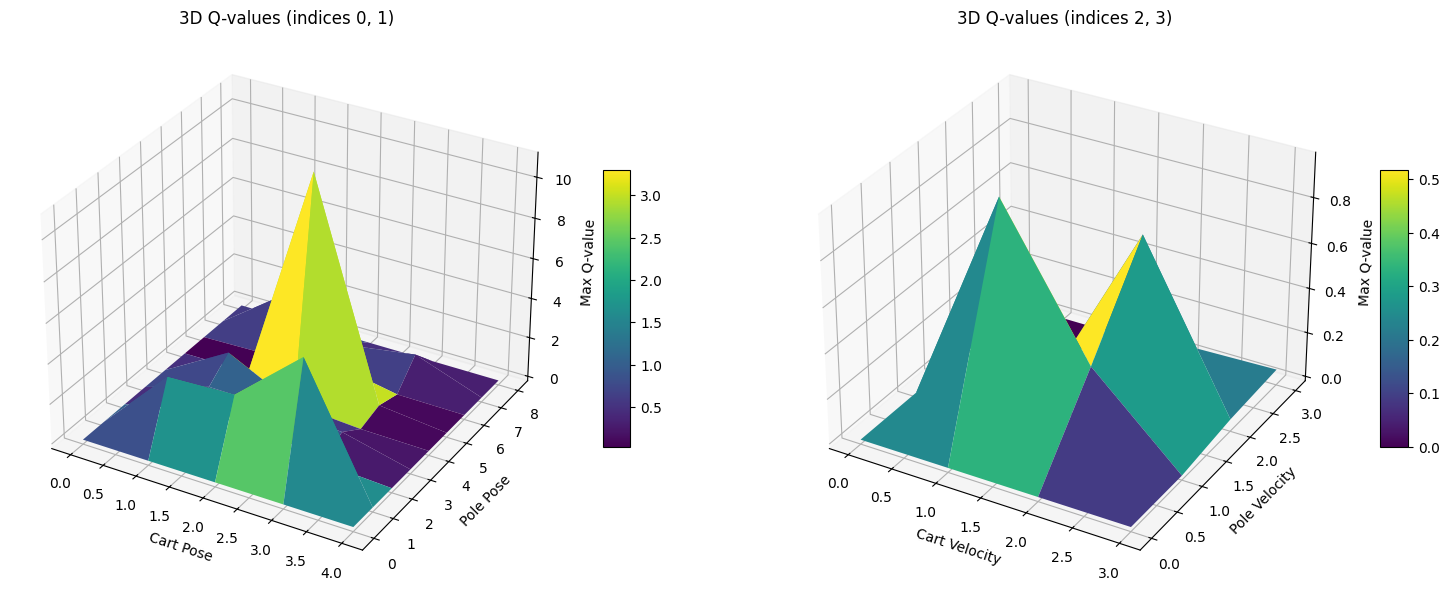

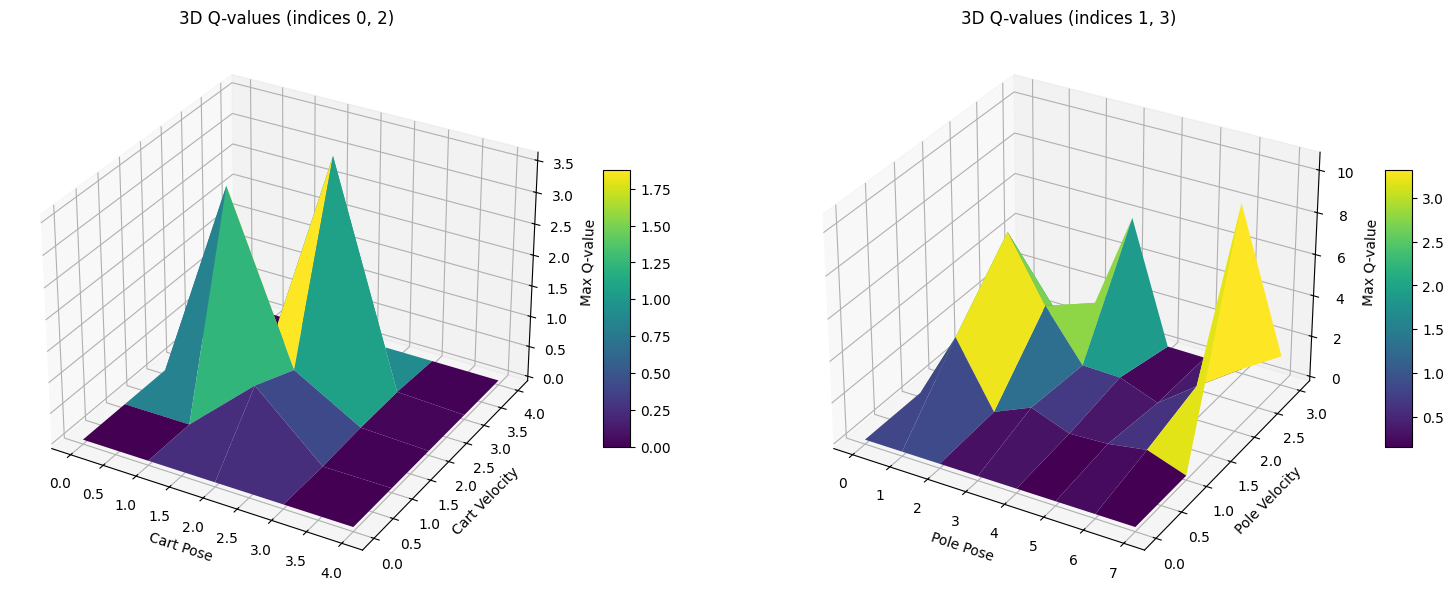

In [23]:
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_3000), (0,1), (4,8),(2,3), (4,4))
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_3000), (0,2), (4,4),(1,3), (8,4))

#### **Episode 5000**

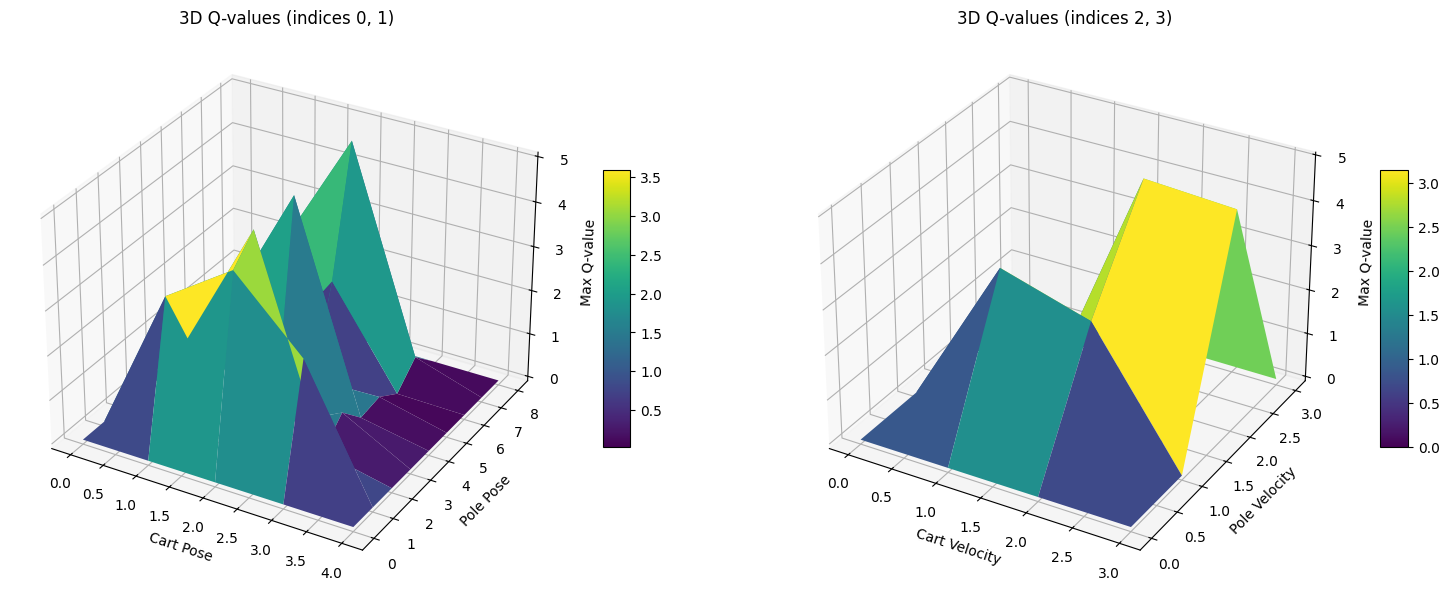

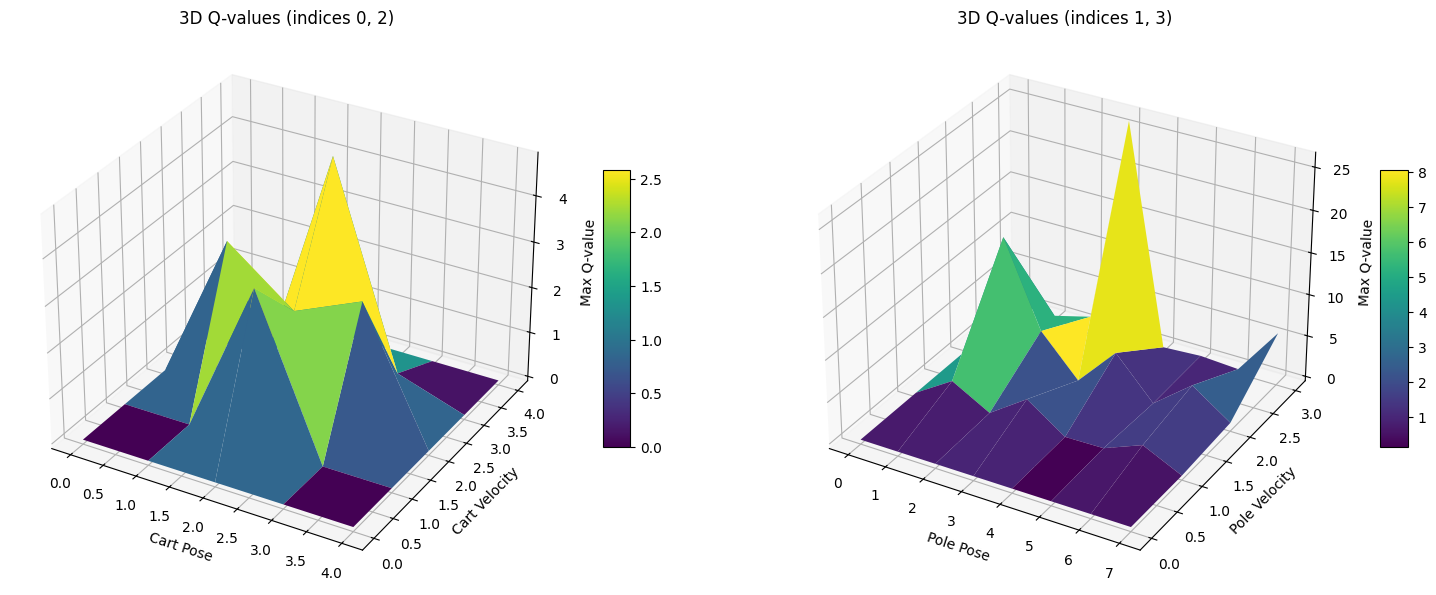

In [24]:
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_5000), (0,1), (4,8),(2,3), (4,4))
plot_q_values_3d_dual(load_q_values(q_learn_q_value_file_5000), (0,2), (4,4),(1,3), (8,4))

### **Double Q Learning**

### **SARSA**

### **Monte Carlo**

## **Discount Factor Effect**
- Evaluate and analyze the effect of the discount factor, especially on Monte Carlo updating methods, which is most clearly observed in high-variance methods.